### Example

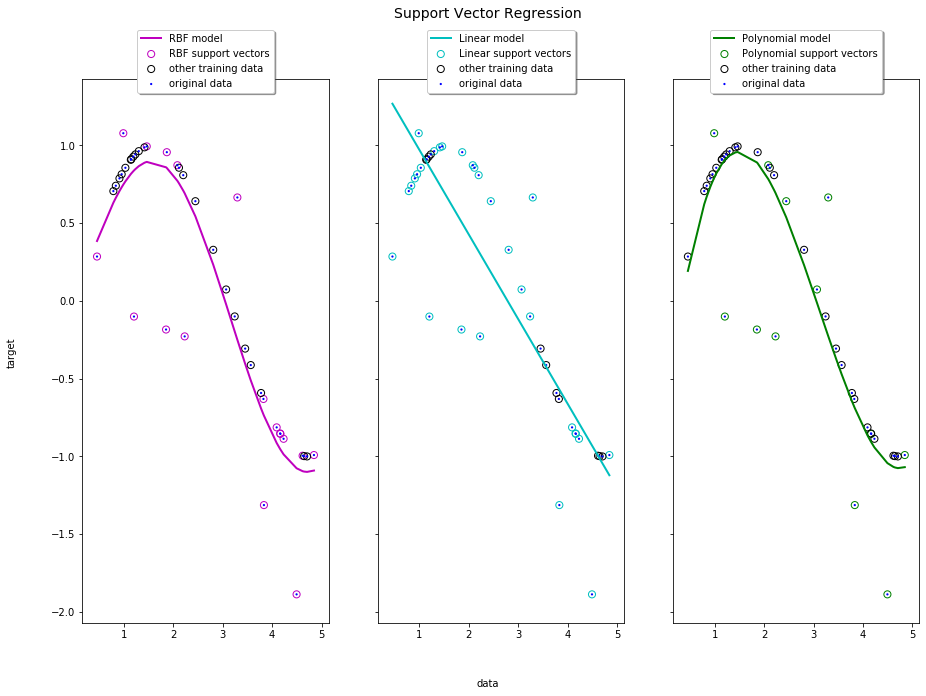

In [33]:

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
#Return a contiguous flattened array.
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets, y[::5] is y[0],y[5],y[10],y[15],etc
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    #svr.support_ gives the support vectors
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     # facecolor is the color that fills in the datapoints circles
                     edgecolor=model_color[ix], s=50, 
                     # s is the size of the datapoints
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     # set difference, Return the unique values in arg1 that are not in arg2.
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].scatter(X, y,facecolor="b", edgecolor="none", s=5,
                     label='original data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [28]:
[item for item in list(X) if item not in list(X[svr_rbf.support_])+list(X[np.setdiff1d(np.arange(len(X)), svr.support_)])]


[array([0.23576074]),
 array([1.00388908]),
 array([1.98555564]),
 array([2.66159609]),
 array([4.563617]),
 array([4.81279637]),
 array([4.88469306])]

In [53]:
svr_rbf.support_.tolist()

[0, 5, 10, 14, 15, 16, 17, 20, 25, 29, 30, 31, 32, 33, 34, 35, 36, 39]

In [35]:
len(np.setdiff1d(np.arange(len(X)), svr.support_))

28

In [52]:
set(np.arange(len(X)))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

### SVM from scratch

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class SVM:
    def __init__(self, visualization=True):
        self.visualization=visualization
        self.colors={1:'r',-1:'b'}
        if self.visualization:
            self.fig=plt.figure
            self.ax=self.fig.add_subplot(1,1,1)
    #train
    def fit(self,data):
        self.data=data
        # {||W||:[w,b]}
        opt_dict={}
        
        #can be generalized
        transforms=[[1,1],[1,-1],[-1,1],[-1,-1]]
        
        all_data=[]
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        self.max_feature_value=max(all_data)
        self.min_feature_value=min(all_data)
        
        #release the data from memory, so that it's not overo-ccupied
        all_data=None
        
        #support vectors yi(xi.w+b)=1
        step_sizes=[self.max_feature_value*0.1,self.max_feature_value*0.01,self.max_feature_value*0.001]
        
        #expensive, b doesn't need to take small steps as w does
        b_range_multiple=5
        
        b_multiple=5
        
        latest_optimum=sefl.max_feature_value*10
        
        
        for step in step_sizes:
            w=np.array([latest_optimum,latest_optimum])
            
            #due to convex 
            optimized=False
            
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple, self.max_feature_value*b_range_multiple, 
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t=w*transformation
                        found_option=True
                        
                        #yi(xi.w+b)>=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                if w[0]<0:
                    optimized=True
                    print('Optimized a step.')
                else:
                    w=w-step
            
            norms=sorted([n for n in opt_dict])
            opt_choice=opt_dict[norms[0]]
            #{||w||:[w,b]}
            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            latest_optimum=opt_choice[0][0]+step*2
            
            
            
            
                                    
                                
                            
                            
                        
                    
                
                
            
        
            

    
    
    def predict(self,features):
        #sign(x.w+b)
        classification=np.sign(np.dot(np.array(features),self.w)+self.b)
        
        return classification

    
data_dict={-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}

        
        

IndentationError: expected an indented block (<ipython-input-5-a0f448947c3c>, line 71)